<a href="https://colab.research.google.com/github/ramesitexp/DataScience_Zone/blob/main/cnn_image_identification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Here's a simple Python code for image classification using Convolutional Neural Networks (CNNs) with Keras:


# Import necessary libraries
from tensorflow.keras.models import Sequential # Changed from keras.models to tensorflow.keras.models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Changed from keras.layers to tensorflow.keras.layers
from tensorflow.keras.utils import to_categorical # Changed from keras.utils to tensorflow.keras.utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Changed from keras.preprocessing.image to tensorflow.keras.preprocessing.image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 97ms/step - accuracy: 0.8047 - loss: 0.6251 - val_accuracy: 0.9726 - val_loss: 0.0894
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.9778 - loss: 0.0709 - val_accuracy: 0.9818 - val_loss: 0.0582
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 91ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9845 - val_loss: 0.0508
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.9889 - loss: 0.0355 - val_accuracy: 0.9871 - val_loss: 0.0426
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.9906 - loss: 0.0278 - val_accuracy: 0.9878 - val_loss: 0.0399
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.9924 - loss: 0.0237 - val_accuracy: 0.9865 - val_loss: 0.0464
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.9946 - loss: 0.0177 - val_accuracy: 0.9879 - val_loss: 0.0404
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 93ms/step - accuracy: 0.9953 - loss: 0.0153 -

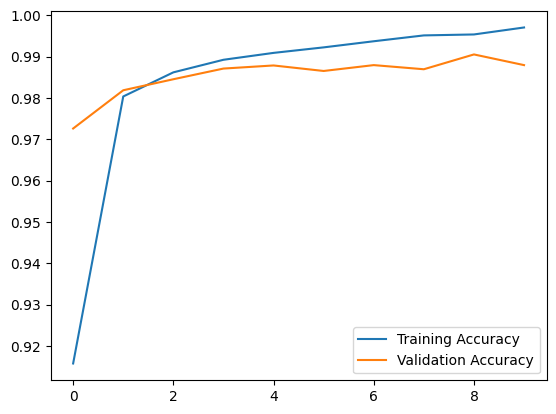

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape input data
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class labels to categorical labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()